In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne
mne.set_log_level('error') 
import warnings
warnings.filterwarnings("ignore")
import os
import glob
import re
import shutil
import pingouin as pg
from utility import get_candlist

ModuleNotFoundError: No module named 'mne'

In [2]:
plist, candlist = get_candlist(exclude=['PA17'])

N. Selected Participants: 25 N. Selected Trials: 186
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 27, 28, 29, 30, 31, 32, 33]
[('PA6', 314), ('PA7', 314), ('PA8', 314), ('PA9', 314), ('PA11', 314), ('PA12', 314), ('PA13', 314), ('PA14', 314), ('PA15', 314), ('PA18', 314), ('PA19', 314), ('PA20', 314), ('PA24', 314), ('PA27', 314), ('PA28', 314), ('PA33', 314), ('PA7', 320), ('PA8', 320), ('PA9', 320), ('PA10', 320), ('PA5', 320), ('PA11', 320), ('PA12', 320), ('PA14', 320), ('PA18', 320), ('PA20', 320), ('PA21', 320), ('PA22', 320), ('PA28', 320), ('PA30', 320), ('PA31', 320), ('PA32', 320), ('PA33', 320), ('PA6', 353), ('PA8', 353), ('PA9', 353), ('PA12', 353), ('PA14', 353), ('PA16', 353), ('PA18', 353), ('PA22', 353), ('PA27', 353), ('PA28', 353), ('PA29', 353), ('PA30', 353), ('PA31', 353), ('PA33', 353), ('PA7', 355), ('PA8', 355), ('PA9', 355), ('PA5', 355), ('PA11', 355), ('PA12', 355), ('PA14', 355), ('PA15', 355), ('PA18', 355), ('PA19', 355), ('PA20', 3

# EEG

In [2]:
target_dir = os.path.join('../data', 'eegcomb')
if os.path.isdir(target_dir):
    shutil.rmtree(target_dir)
os.mkdir(target_dir)


def flatten_list(irregular_list):
    flat_list = []
    for item in irregular_list:
        if isinstance(item, list):
            flat_list.extend(flatten_list(item))
        else:
            flat_list.append(item)
    return flat_list


def get_eeg_files(name, plist, topic=None):
    plist = sorted(plist, key=lambda x: int(x[2:]))
    dir = os.path.join(target_dir, name)

    if os.path.isdir(dir):
        shutil.rmtree(dir)
    os.mkdir(dir)

    files = [glob.glob(f'../data/{p}/epochs/eeg_epochs/*-Topic*-*-Stage{name}-epo.fif') for p in plist]

    files = flatten_list(files)
    if len(files) == 0:
        print(name, 'for Topic', topic, 'and', len(plist), 'participants', 'No files found')
        return

    print(name, 'for Topic', topic, 'and', len(plist), 'participants', len(files), 'files found')

    for f in files:
        fname = os.path.join(dir, f.split('\\')[-1])
        shutil.copy2(f, fname)

for name in ['READ', 'LISTEN', 'SPEAK', 'TYPE', 'IN', 'QF',]:
    get_eeg_files(name=name, plist=plist, topic=None)

get_eeg_files(name='EYECLOSE', plist=plist, topic='Baseline')
get_eeg_files(name='EYEOPEN', plist=plist, topic='Baseline')

NameError: name 'os' is not defined

In [3]:
import matplotlib.patches as mpatches
eoi = ['EYECLOSE', 'IN', 'QF',  'SPEAK', 'TYPE','READ', 'LISTEN']
meta_eoi = ['EYECLOSE', 'IN', 'QF', 'QS', 'RJ'] #'EYEOPEN',

colors = {'EYEOPEN':  '#fb9a99', 'BASELINE':  '#00A0B0', 'EYECLOSE':  '#00A0B0',
 'IN': '#6A4A3C',
 'QF': '#cc333f',
 'QS': '#eb6841',
 'RJ': '#edc951',
 'READ': '#a58c38',
 'LISTEN': '#f2d985',
 'SPEAK': '#a4482d', 'TYPE': '#ef8666'}


boxprops={
    'palette': colors,
     'flierprops': {"marker": "x"},
    'boxprops': {"edgecolor": "white"},
     'medianprops':{"color": "white", "linewidth": 1.5},
    'showmeans': True, 'meanline': True, 'meanprops': {'color': 'red','ls': '--', 'lw': 1.5},
}

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def style_plot(axes, ylabel, hatch_labels, hatches = ['//', '..'], ylim=None):

    bars = sorted(axes[1].patches, key=lambda bar: bar.get_x())
    for i, bar in enumerate(bars):
        la = axes[1].get_xticklabels()[i//2].get_text()
        bar.set_color(colors[la])
        bar.set_edgecolor('white')
        hatch = hatches[i % len(hatches)]
        bar.set_hatch(hatch)

    for i in range(2):
        axes[i].set_xlabel(None)
        axes[i].grid(axis='y', alpha=0.6)

    gap_width = 0.03
    for i, bar in enumerate(bars):
        if i % 2 == 0:  
            bar.set_x(bar.get_x() - gap_width / 2)
        else:
            bar.set_x(bar.get_x() + gap_width / 2)

    axes[1].figure.canvas.draw()
    axes[1].set_ylim(ylim)

    if hatch_labels is not None:
        handles=[]
        for hat_l, hat in zip(hatch_labels, hatches):
            handles.append(mpatches.Patch(facecolor='white', hatch=hat, edgecolor='black', label=hat_l))
        axes[1].legend(handles=handles)

    axes[0].set_ylabel(ylabel)

    return axes

## Process

In [4]:
arousal_roi = ['AF3', 'AF4', 'F3', 'F4']
valence_roi = ['F3', 'F4']
cognitive_theta_roi = ['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8']
cognitive_alpha_roi = ['P7', 'P8']

def calculate_metrics(freq_df, time_combine=False, times=None):
    if not time_combine:
        val_left = freq_df['alpha']['F3'].mean()/freq_df['beta']['F3'].mean()
        val_right = freq_df['alpha']['F4'].mean()/freq_df['beta']['F4'].mean()
        val = np.log(val_right) - np.log(val_left)
        # val = val_right - val_left
    
        alpha_arousal = freq_df['alpha'][arousal_roi].mean().sum()
        beta_arousal = freq_df['beta'][arousal_roi].mean().sum()
        aro = beta_arousal/alpha_arousal
    
        alpha_cognitive = freq_df['alpha'][cognitive_alpha_roi].mean().mean()
        theta_cognitive = freq_df['theta'][cognitive_theta_roi].mean().mean()
        cog = theta_cognitive/alpha_cognitive
    
        return [val, aro, cog, val_left, val_right, alpha_arousal, beta_arousal, alpha_cognitive, theta_cognitive]
    else:
        metrics = {}
    
        for t in times:
            val_left = freq_df['alpha'][freq_df['alpha'].time == t]['F3'].mean()/freq_df['beta'][freq_df['beta'].time == t]['F3'].mean()
            val_right = freq_df['alpha'][freq_df['alpha'].time == t]['F4'].mean()/freq_df['beta'][freq_df['beta'].time == t]['F4'].mean()
            val = val_right - val_left
    
            alpha_arousal = freq_df['alpha'][freq_df['alpha'].time == t][arousal_roi].sum().sum()
            beta_arousal = freq_df['beta'][freq_df['beta'].time == t][arousal_roi].sum().sum()
            aro = np.log(beta_arousal)/np.log(alpha_arousal)
    
            alpha_cognitive = freq_df['alpha'][freq_df['alpha'].time == t][cognitive_alpha_roi].mean().mean()
            theta_cognitive = freq_df['theta'][freq_df['theta'].time == t][cognitive_theta_roi].mean().mean()
            cog = theta_cognitive/alpha_cognitive
    
            metrics.update({t: [val, aro, cog, val_left, val_right, alpha_arousal, beta_arousal, alpha_cognitive, theta_cognitive]}) # left_front_theta, right_front_theta
    
        return metrics


def eeg_power_band(eeg):
    eeg.load_data()
    freq_info = [('alpha', 8.0, 12.0), ('beta', 13.0, 25.0), ('theta', 4.0, 8.0)]
    freq_df = {}
    chs = cognitive_alpha_roi+cognitive_theta_roi

    spectrum = eeg.copy().compute_psd(method='welch', average="mean", fmin=4, fmax=25,
                              picks=chs, n_fft=int(eeg.info['sfreq']), output='power',window='hamming')
    channel_names = spectrum.ch_names
    psds, freqs = spectrum.get_data(return_freqs=True)
    psds /= np.sum(psds, axis=-1, keepdims=True)

    for (name, fmin, fmax) in freq_info:
        X = psds[:, :, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
        X = X.reshape(len(psds), -1)
        df = pd.DataFrame(X, columns=channel_names)
        df = df.rename_axis('time')
        df = df.reset_index(drop=False)
        freq_df.update({name: df})

    metrics = calculate_metrics(freq_df)
    return metrics



def read_data(name, topic=None, band=None, exclude_topic=None, trim_sec=None):
    files = glob.glob(f'../data/eegcomb/{name}/*-Stage{name}-epo.fif')
    if len(files) == 0:
        print('No files found')
        return

    epochs, ps = [], []
    files = sorted(files, key=lambda x: int(re.match('.*PA(\d+)-.*', x).group(1)))

    for file in files:
        if exclude_topic is not None:
            if file.__contains__(f'Topic{str(exclude_topic)}'):
                continue

        e = mne.read_epochs(file, preload=True)

        if trim_sec: e = e[trim_sec*2-1:]
        data = eeg_power_band(e)

        p = re.match(r'(?:.*)(PA\d+)-.*-epo.fif', file).group(1)
        ps.append(p)
        tp = re.match(r'(?:.*)-Topic(.*)(?:-Task).*-.*-epo.fif', file).group(1)

        if not name.__contains__('EYE'):
            if p not in plist: continue
            if (p, int(tp)) not in candlist:
                continue

        data.append(p)
        data.append(tp)
        epochs.append(data)

    ps = list(set(ps))
    ps.sort(key= lambda x: int(x[2:]))
    print(name, topic, band, '| N participants in the data:', len(ps), '| N files:', len(epochs))
    epochs = pd.DataFrame(epochs, columns=['valence', 'arousal', 'cognition', 'val_left', 'val_right', 'aro_alpha', 'aro_beta', 'cog_alpha', 'cog_theta', 'pid', 'topic']) #, 'LF_theta', 'RF_theta'
    return epochs

In [ ]:
def aggregate(baseline, data):
    cols = ['valence', 'arousal', 'cognition', 'val_left', 'val_right', 'aro_alpha', 'aro_beta', 'cog_alpha', 'cog_theta', ]

    temp = baseline['CLOSE'].groupby(['pid'])[cols].mean()
    temp.loc[:, 'cond'] = 'EYECLOSE'
    temp.loc[:, 'meta_cond'] = 'EYECLOSE'
    df = [temp]

    temp = baseline['OPEN'].groupby(['pid'])[cols].mean()
    temp.loc[:, 'cond'] = 'EYEOPEN'
    temp.loc[:, 'meta_cond'] = 'EYEOPEN'
    df.append(temp)

    for cond, temp in data.items():
        temp = temp.groupby(['pid', 'topic'])[cols].mean().reset_index(level=1, drop=False).drop(columns=['topic'])
        temp = temp.groupby(['pid'])[cols].mean()
        temp.loc[:, 'cond'] = cond
        if cond in ['READ', 'LISTEN']:
            temp.loc[:, 'meta_cond'] = 'RJ'
        elif cond in ['SPEAK', 'TYPE']:
            temp.loc[:, 'meta_cond'] = 'QS'
        else:
            temp.loc[:, 'meta_cond'] = cond
        df.append(temp)
    df = pd.concat(df)
    df.reset_index(drop=False, inplace=True)
    return df

#### load data

In [ ]:
baseline = {'CLOSE': read_data(name='EYECLOSE', topic='Baseline'), 'OPEN': read_data(name='EYEOPEN', topic='Baseline')}
data = {'READ': read_data(name='READ'),
        'LISTEN': read_data(name='LISTEN'),
        'SPEAK': read_data(name='SPEAK'),
        'TYPE': read_data(name='TYPE'),
        'IN': read_data(name='IN'),
        'QF': read_data(name='QF')}

In [37]:
df = aggregate(baseline, data).round(4)
df

,pid,valence,arousal,cognition,val_left,val_right,aro_alpha,aro_beta,cog_alpha,cog_theta,cond,meta_cond
0,PA10,-0.1261,0.2098,0.5344,4.8786,4.3006,0.3511,0.0737,0.0878,0.0469,EYECLOSE,EYECLOSE
1,PA11,0.2191,0.4395,2.2417,1.9587,2.4386,0.2256,0.0992,0.0474,0.1063,EYECLOSE,EYECLOSE
2,PA12,-0.8776,0.0754,0.1993,18.3206,7.6174,0.6809,0.0513,0.1672,0.0333,EYECLOSE,EYECLOSE
3,PA13,0.6687,0.1183,0.3916,4.3861,8.5602,0.4729,0.0560,0.1314,0.0515,EYECLOSE,EYECLOSE
4,PA14,-0.3281,0.2989,0.7767,4.3016,3.0985,0.3735,0.1116,0.0715,0.0555,EYECLOSE,EYECLOSE
...,...,...,...,...,...,...,...,...,...,...,...,...
194,PA5,0.0337,0.5646,1.0525,2.0479,2.0487,0.2394,0.1336,0.0681,0.0712,QF,QF
195,PA6,0.1403,0.8992,1.4437,1.3662,1.5376,0.1769,0.1572,0.0465,0.0666,QF,QF
196,PA7,0.0822,0.9434,1.7031,0.9561,1.0376,0.1621,0.1523,0.0483,0.0823,QF,QF
197,PA8,-0.1367,0.5839,1.8719,1.8860,1.6748,0.2091,0.1214,0.0498,0.0924,QF,QF


In [38]:
df.to_csv('../results/aggregate_eeg.csv')

## Analysis

In [3]:
df = pd.read_csv('../results/aggregate_eeg.csv', index_col=0)
df

,pid,FAA,BAR,TAR,val_left,val_right,aro_alpha,aro_beta,cog_alpha,cog_theta,cond,meta_cond,topic
0,PA10,-0.126086,0.209819,0.534446,1.584849,1.458763,0.351103,0.073668,0.087780,0.046913,EYECLOSE,EYECLOSE,Baseline
1,PA11,0.219120,0.439528,2.241681,0.672297,0.891417,0.225631,0.099171,0.047419,0.106298,EYECLOSE,EYECLOSE,Baseline
2,PA12,-0.877586,0.075409,0.199339,2.908024,2.030438,0.680925,0.051348,0.167215,0.033332,EYECLOSE,EYECLOSE,Baseline
3,PA13,0.668688,0.118316,0.391617,1.478431,2.147119,0.472949,0.055957,0.131386,0.051453,EYECLOSE,EYECLOSE,Baseline
4,PA14,-0.328058,0.298859,0.776659,1.458977,1.130918,0.373459,0.111612,0.071462,0.055501,EYECLOSE,EYECLOSE,Baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,PA9,0.067480,0.437204,1.081736,0.884945,0.952425,0.267170,0.116808,0.077282,0.083598,QF,QF,448
790,PA9,0.196995,0.279545,1.137585,1.261988,1.458983,0.298283,0.083384,0.081562,0.092784,QF,QF,708
791,PA9,0.156981,0.445665,0.923530,0.756424,0.913404,0.282213,0.125772,0.082462,0.076156,QF,QF,711
792,PA9,0.214267,0.532893,0.857577,0.589586,0.803853,0.240367,0.128090,0.085541,0.073358,QF,QF,725


### TAR

In [13]:
def draw_all_plot(feature_to_draw, file_name, ylabel=None):
    _, axes = plt.subplots(figsize=(5, 3))
    sns.boxplot(data=df, x='meta_cond', y=feature_to_draw, ax=axes, order=meta_eoi, **boxprops)
    axes.grid(axis='y', alpha=0.3)
    axes.set_xlabel(None)
    if ylabel is not None:
        axes.set_ylabel(ylabel)
    
    plt.tight_layout()
    plt.savefig(file_name, dpi=500)
    plt.show()

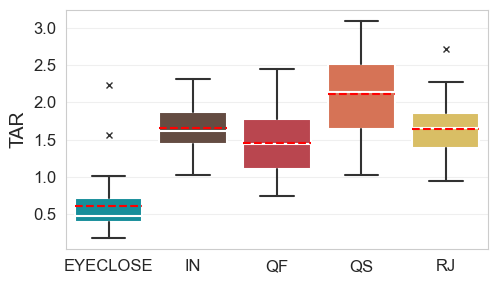

In [14]:
draw_all_plot('cognition', '../results/TAR_meta.pdf', 'TAR')

### BAR

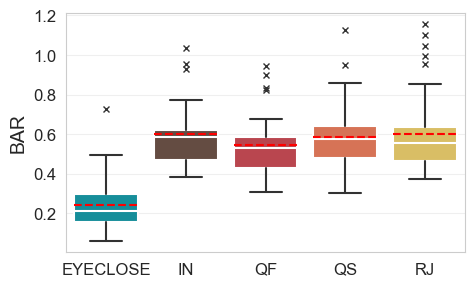

In [17]:
draw_all_plot('arousal', '../results/BAR_meta.pdf', 'BAR')

### FAA

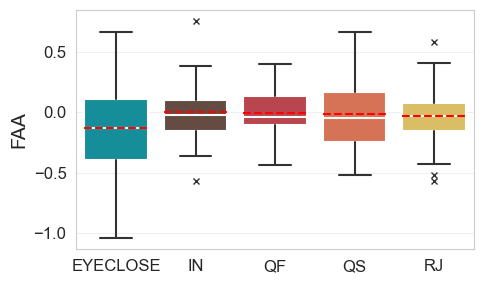

In [20]:
draw_all_plot('valence', '../results/FAA_meta.pdf', 'FAA')

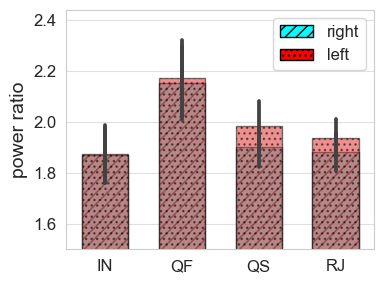

In [21]:
_, axes = plt.subplots(figsize=(4,3))

# axes = sns.barplot(data=df[df!='EYECLOSE'], x='meta_cond', y='val_right', errorbar='se', ax=axes, width=0.6, order=meta_eoi[1:], color='cyan', alpha=0.5, hatch='///', edgecolor='black')
# axes = sns.barplot(data=df[df!='EYECLOSE'], x='meta_cond', y='val_left', errorbar='se', ax=axes, width=0.6, order=meta_eoi[1:], color='red', alpha=0.5, hatch='...', edgecolor='black')
axes = sns.barplot(data=pd.melt(df[df!='EYECLOSE'], id_vars=['meta_cond'], value_vars=['val_left', 'val_right',]),
                   x='meta_cond', y='value', hue='variable', errorbar='se',
                   ax=axes, width=0.4, order=meta_eoi[1:],)
axes.set_xlabel(None)
axes.set_ylabel('power ratio')
axes.grid(axis='y', alpha=0.6)
axes.set_ylim(1.5)
handles = []
handles.append(mpatches.Patch(facecolor='cyan', hatch='///', label='right', edgecolor='black'))
handles.append(mpatches.Patch(facecolor='red', hatch='...', label='left', edgecolor='black'))
axes.legend(loc='upper right', handles=handles)
plt.tight_layout()
plt.savefig('../images/FAA_left_right.pdf', dpi=500)
plt.show()

### statistic test

In [39]:
tbs = None

for f in ['valence', 'arousal', 'cognition']:
    tb = pg.pairwise_tests(dv=f, within='meta_cond', subject='pid', data=df[df.meta_cond != 'EYEOPEN'], effsize='eta-square')
    tb.loc[:, 'var'] = f
    if tbs is None:
        tbs = tb
    else:
        tbs = pd.concat([tbs, tb], axis=0)
tbs.round(3)
# tbs.to_csv('../results/eeg_index_posthoc.csv')
tbs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,eta-square,var
0,meta_cond,EYECLOSE,IN,True,True,-1.504079,24.0,two-sided,1.456081e-01,0.57,0.032358,valence
1,meta_cond,EYECLOSE,QF,True,True,-1.413185,24.0,two-sided,1.704404e-01,0.509,0.029950,valence
2,meta_cond,EYECLOSE,QS,True,True,-1.200424,24.0,two-sided,2.416898e-01,0.401,0.024123,valence
3,meta_cond,EYECLOSE,RJ,True,True,-1.236359,24.0,two-sided,2.282887e-01,0.417,0.021276,valence
4,meta_cond,IN,QF,True,True,0.321171,24.0,two-sided,7.508607e-01,0.221,0.000685,valence
...,...,...,...,...,...,...,...,...,...,...,...,...
5,meta_cond,IN,QS,True,True,-6.630911,24.0,two-sided,7.378790e-07,2.365e+04,0.193268,cog_theta
6,meta_cond,IN,RJ,True,True,-0.030962,24.0,two-sided,9.755556e-01,0.211,0.000002,cog_theta
7,meta_cond,QF,QS,True,True,-8.977279,24.0,two-sided,3.869383e-09,3.134e+06,0.294265,cog_theta
8,meta_cond,QF,RJ,True,True,-4.802608,24.0,two-sided,6.860043e-05,377.176,0.044188,cog_theta
